# **THREADS Ghana: Data Exploration and Analysis**
#### *Richelle Johnson, iTHREADS Fellow*
### **Preliminary Research Question**
##### How does access to prenatal care and prenatal care professionals impact maternal healthcare among women ages 18-35 in Ghana?
### **Problem Statement**
##### There's a lack of proper and predictable access to pre- and post-natal care in underdeveloped countries such as Ghana. This is partially due to a lack of resources, as economic development remains a challenge. A consequence of this is that many women go without access to maternal healthcare during their pregnancy and even during conception, which may inform when, how, and if they decide to have children.
##### **Hypothesis:** Greater access to prenatal care improves likelihood of a healthy pregnancy and delivery.
### **Data Set Description**
##### The data set is from <u>Wave 3</u> of the Ghana Socioeconomic Panel Survey, from 2018-2019. This specific analysis focuses on fertility. More specifically, it focuses on women's fertility and reproductive health as it relates to pregnancy and post-natal care.

### **1. Importing the Libraries**

In [15]:
# Import the libraries
import numpy as np
import pandas as pd
# Import matplot for plotting
import matplotlib.pyplot as plt  
# And seaborn for visualization 
import seaborn as sns

# Let's make sure pandas returns all the rows and columns for the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Force pandas to display full numbers instead of scientific notation
pd.options.display.float_format = '{:.0f}'.format

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### **2. Read the Data Set**

In [17]:
fertility_data = pd.read_stata("/Users/richellejohnson/Desktop/07a_fertility.dta")
# Display the first seven rows of the data set
fertility_data.head(7)

,FPrimary,index,hhmid,age,gender,maritalstatus,new_mem,agemenarche,agemenopause,threemonthsnomens,agesexactive,howmanymoreboys,howmanymoregirls,childnextthreeyears,everpregnant,evergivenbirth,borngirls,bornboys,borntotal,borntotalcheck,alivegirls,aliveboys,alivetotal,alivetotalcheck,nonliveany,nonlivehowmany,childcheck,numdeadchildren,new_numdeadchildren,ask,babyindex_1,babyyearborn_1,babygender_1,babyageyears_1,babyagemonths_1,babyindex_2,babyyearborn_2,babygender_2,babyageyears_2,babyagemonths_2,babyindex_3,babyyearborn_3,babygender_3,babyageyears_3,babyagemonths_3,babyindex_4,babyyearborn_4,babygender_4,babyageyears_4,babyagemonths_4,babyindex_5,babyyearborn_5,babygender_5,babyageyears_5,babyagemonths_5,breastfeedingnow,pregnantnow,yourselfwantbaby_pregnant,partnerwantbaby_pregnant,yourselfwantbaby,partnerwantbaby,pregnantlastyear,preglastyearend,preglastyearendother,weightatbirth,stillalive,lastchildmenses,lastchildresumesex,lastchildbreastfeed,prenatany,prenatfirstreceived,prenatwhere,prenatwhere_1,prenatwhere_2,prenatwhere_3,prenatwhere_4,prenatwhere_5,prenatwhere_6,prenatwhere_666,prenatwhere_888,prenatwhere_999,prenatwhereother,prenatwho,prenatwho_1,prenatwho_2,prenatwho_3,prenatwho_4,prenatwho_5,prenatwho_6,prenatwho_7,prenatwho_8,prenatwho_9,prenatwho_10,prenatwho_666,prenatwho_888,prenatwho_999,prenatwhoother,prenatvisits,prenatfirstcost,prenatwhynot,prenatwhynotother,lastpregnantyears,lastpregnantmonths
0,1008308001,1,1,20,1,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,NaN,NaN
1,1009320001,1,2,17,5,6,0,15,NaN,No,16,2,2,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,NaN,NaN
2,1009320001,2,1,80,5,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,NaN,NaN
3,1009320001,3,3,15,1,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,NaN,NaN
4,101001002,1,1,35,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,NaN,NaN
5,101001002,2,2,30,5,1,0,18,NaN,Yes,20,0,2,No,Yes,Yes,1,3,4,Yes,1,3,4,Yes,Yes,1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,Yes,Yes,No,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,2,9
6,101001002,3,5,9,1,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,NaN,NaN


In [18]:
# Display the last seven rows of the data set
fertility_data.tail(7)

,FPrimary,index,hhmid,age,gender,maritalstatus,new_mem,agemenarche,agemenopause,threemonthsnomens,agesexactive,howmanymoreboys,howmanymoregirls,childnextthreeyears,everpregnant,evergivenbirth,borngirls,bornboys,borntotal,borntotalcheck,alivegirls,aliveboys,alivetotal,alivetotalcheck,nonliveany,nonlivehowmany,childcheck,numdeadchildren,new_numdeadchildren,ask,babyindex_1,babyyearborn_1,babygender_1,babyageyears_1,babyagemonths_1,babyindex_2,babyyearborn_2,babygender_2,babyageyears_2,babyagemonths_2,babyindex_3,babyyearborn_3,babygender_3,babyageyears_3,babyagemonths_3,babyindex_4,babyyearborn_4,babygender_4,babyageyears_4,babyagemonths_4,babyindex_5,babyyearborn_5,babygender_5,babyageyears_5,babyagemonths_5,breastfeedingnow,pregnantnow,yourselfwantbaby_pregnant,partnerwantbaby_pregnant,yourselfwantbaby,partnerwantbaby,pregnantlastyear,preglastyearend,preglastyearendother,weightatbirth,stillalive,lastchildmenses,lastchildresumesex,lastchildbreastfeed,prenatany,prenatfirstreceived,prenatwhere,prenatwhere_1,prenatwhere_2,prenatwhere_3,prenatwhere_4,prenatwhere_5,prenatwhere_6,prenatwhere_666,prenatwhere_888,prenatwhere_999,prenatwhereother,prenatwho,prenatwho_1,prenatwho_2,prenatwho_3,prenatwho_4,prenatwho_5,prenatwho_6,prenatwho_7,prenatwho_8,prenatwho_9,prenatwho_10,prenatwho_666,prenatwho_888,prenatwho_999,prenatwhoother,prenatvisits,prenatfirstcost,prenatwhynot,prenatwhynotother,lastpregnantyears,lastpregnantmonths
18999,908308001,1,2,14,1,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,NaN,NaN
19000,908308001,2,1,35,5,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,NaN,NaN
19001,908308001,3,3,17,1,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,NaN,NaN
19002,908308001,4,4,6,5,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,NaN,NaN
19003,909320001,1,1,26,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,NaN,NaN
19004,909320001,2,2,24,5,1,1,15,NaN,Yes,16,2,2,Yes,Yes,Yes,1,0,1,Yes,1,NaN,1,Yes,No,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,NaN,NaN,Yes,Yes,Yes,Live birth,,3,Yes,NaN,NaN,NaN,Yes,8,2,0,1,0,0,0,0,0,0,0,,4,0,0,0,1,0,0,0,0,0,0,0,0,0,,7,20,NaN,,NaN,NaN
19005,909320001,3,3,0,5,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,NaN,NaN


##### The data set has **33 columns** and **19,006 rows**.

In [20]:
# Display the shape of the data set
fertility_data.shape

(19006, 103)

##### The data set includes object, float, integer, and category **data types**.

In [22]:
# Display the info of the data set
fertility_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19006 entries, 0 to 19005
Columns: 103 entries, FPrimary to lastpregnantmonths
dtypes: category(24), float32(2), float64(43), int16(1), int8(26), object(7)
memory usage: 8.3+ MB


##### The summary statistics for the data represent the mean, median, maximum, minimum, and standard deviation of variables included within the df.

In [24]:
# Display summary statistics for the data set
fertility_data.describe()

,index,hhmid,age,gender,maritalstatus,new_mem,agemenarche,agemenopause,agesexactive,howmanymoreboys,howmanymoregirls,borngirls,bornboys,borntotal,alivegirls,aliveboys,alivetotal,nonlivehowmany,numdeadchildren,new_numdeadchildren,ask,babyindex_1,babyyearborn_1,babyageyears_1,babyagemonths_1,babyindex_2,babyyearborn_2,babyageyears_2,babyagemonths_2,babyindex_3,babyyearborn_3,babyageyears_3,babyagemonths_3,babyindex_4,babyyearborn_4,babyageyears_4,babyagemonths_4,babyindex_5,babyyearborn_5,babyageyears_5,babyagemonths_5,weightatbirth,lastchildmenses,lastchildresumesex,lastchildbreastfeed,prenatfirstreceived,prenatwhere_1,prenatwhere_2,prenatwhere_3,prenatwhere_4,prenatwhere_5,prenatwhere_6,prenatwhere_666,prenatwhere_888,prenatwhere_999,prenatwho_1,prenatwho_2,prenatwho_3,prenatwho_4,prenatwho_5,prenatwho_6,prenatwho_7,prenatwho_8,prenatwho_9,prenatwho_10,prenatwho_666,prenatwho_888,prenatwho_999,prenatvisits,prenatfirstcost,lastpregnantyears,lastpregnantmonths
count,19006,19006,19006,19006,19006,18967,4597,245,3575,4379,4382,2770,2770,2770,2288,2327,2766,731,2766,1884,2766,261,217,256,244,62,49,60,58,20,14,18,17,4,3,4,4,1,1,1,1,245,165,149,90,539,19006,19006,19006,19006,19006,19006,19006,19006,19006,19006,19006,19006,19006,19006,19006,19006,19006,19006,19006,19006,19006,19006,526,536,2263,2129
mean,3,4,29,3,4,0,15,41,18,2,1,2,2,4,2,2,3,1,0,0,0,1,2006,2,2,2,2006,1,2,3,2003,3,1,4,1996,2,2,5,1999,0,5,4,5,5,13,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,17,6,3
std,2,3,22,2,2,0,2,8,3,1,1,1,1,2,1,1,2,1,1,1,1,0,9,4,3,0,9,3,3,0,9,6,2,0,3,3,3,NaN,NaN,NaN,NaN,2,4,5,9,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,32,5,3
min,1,1,0,1,1,0,2,3,0,0,0,0,0,0,0,0,0,0,0,-6,-6,1,1978,0,0,2,1983,0,0,3,1986,0,0,4,1992,0,0,5,1999,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25%,1,2,11,1,1,0,14,40,17,0,0,1,1,2,1,1,2,1,0,0,0,1,2000,0,0,2,2002,0,0,3,1996,0,0,4,1994,0,0,5,1999,0,5,3,3,3,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,2,0
50%,2,3,22,5,6,0,15,43,18,2,1,2,2,3,2,2,3,1,0,0,0,1,2007,0,0,2,2008,0,1,3,2003,0,0,4,1997,2,0,5,1999,0,5,3,4,5,12,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,3
75%,4,5,45,5,6,1,16,45,20,2,2,3,3,5,3,3,5,2,0,0,0,1,2013,2,3,2,2013,1,5,3,2009,2,1,4,1998,4,2,5,1999,0,5,4,6,6,19,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,20,9,6
max,17,32,111,5,7,1,25,50,35,10,10,9,9,14,9,8,12,8,8,4,5,1,2018,27,11,2,2018,18,11,3,2017,25,4,4,1998,5,6,5,1999,0,5,35,30,48,30,36,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,36,200,36,11


##### There are *null values* in **27** of the 33 columns. Because there are null values, the summary statistics may not be accurate. To handle the null values, we can drop the columns irrelevant to the research question, fill the null values with the mean/median value (from summary statistics) or outsource the required information.

In [26]:
# Check for null values
fertility_data.isna().sum()

FPrimary                         0
index                            0
hhmid                            0
age                              0
gender                           0
maritalstatus                    0
new_mem                         39
agemenarche                  14409
agemenopause                 18761
threemonthsnomens            14450
agesexactive                 15431
howmanymoreboys              14627
howmanymoregirls             14624
childnextthreeyears          14695
everpregnant                 14419
evergivenbirth               16115
borngirls                    16236
bornboys                     16236
borntotal                    16236
borntotalcheck               16236
alivegirls                   16718
aliveboys                    16679
alivetotal                   16240
alivetotalcheck              16236
nonliveany                   16114
nonlivehowmany               18275
childcheck                   18563
numdeadchildren              16240
new_numdeadchildren 

In [27]:
# Create a list of the columns in the data set
fertility_data.columns

Index(['FPrimary', 'index', 'hhmid', 'age', 'gender', 'maritalstatus',
       'new_mem', 'agemenarche', 'agemenopause', 'threemonthsnomens',
       ...
       'prenatwho_666', 'prenatwho_888', 'prenatwho_999', 'prenatwhoother',
       'prenatvisits', 'prenatfirstcost', 'prenatwhynot', 'prenatwhynotother',
       'lastpregnantyears', 'lastpregnantmonths'],
      dtype='object', length=103)

## **Stage 2: Data Exploration and Analysis**

### **3. Understand and Clean the Data Set**

#### **Determining Relevant Values**
##### This data set encompasses a number of variables relating to fertility - including menstration cycles, sexual activity, births, time in between pregnancies, and access to medical resources. Because the question of this research project is how access to medical maternal, prenatal, and post-natal resources (public/private clinics, hospitals, maternity homes, home practicioners, etc.) impacts pregnancy and birth among women ages 18-35.

#### **Interpretting Unique Values**
##### For the "Gender" and "Marital Status" columns, it's important to understand the number of values. Traditionally, the values in the "Gender" column are limited to one of two values, set to represent the presumed genders within a culture. To ensure that there is a gender binary within the data set, meaning no more than two options, the number of unique values in the column must be checked. By contrast, the values in the "Marital Status" column extend beyond what can be assumed to be "married" and "unmarried", which acknowledges the complexity of relatonships. To gain greater insight into the relationships of the women surveyed, the number of unique values in the columns should be checked as well.

##### There are **2 unique values** in the gender column. Based on the responses to the other categories, it can be assumed that "5" represents women and girls, and "1" represents men and boys.

In [33]:
# Checking the number of unique values in the "Gender" column
fertility_data["gender"].nunique()

2

##### There are **7 unique values** in the "Marital Status" column. Each represents a different relationship status, ranked 1-7. Excactly what these values mean is **TBD**.

In [35]:
fertility_data["maritalstatus"].nunique()

7

#### **Making a Copy of the Data Set**

##### Before any changes are made to the data frame (i.e. adding new columns, dropping null values) a copy should be made so the original remains unaltered and preserved.

In [38]:
# Make a copy of the data set before making any changes
fertility_df = fertility_data.copy()

#### **Treating Null Values**

##### Some rows will null values will be **dropped** simply because of the sheer volume of null values. This is the most efficient way to gain an overview of the data and extract relevant information that can answer the hypothesis. A limitation of this is that it provides a limited view, but the insights gained from the reduced data set will still be valueable. It is not possible to drop all rows with null values, since each row is missing information in at least one column. Therefore, it must be determined which specific missing values must be removed. Because the data set is looking at access to maternal healthcare, rows that include women who are not pregnant and have never given birth can be dropped. By removing these values, the data set will only include women who are pregnant and/or have givne birth.

In [41]:
# Remove any null values in the "Ever Pregnant" and "Ever Given Birth" categories
# And save the changes by reassigning the variable
fertility_df = fertility_df.dropna(subset=["everpregnant","evergivenbirth"])
# Display the head of the new data frame to show dropped values.
fertility_df.head(15)

,FPrimary,index,hhmid,age,gender,maritalstatus,new_mem,agemenarche,agemenopause,threemonthsnomens,agesexactive,howmanymoreboys,howmanymoregirls,childnextthreeyears,everpregnant,evergivenbirth,borngirls,bornboys,borntotal,borntotalcheck,alivegirls,aliveboys,alivetotal,alivetotalcheck,nonliveany,nonlivehowmany,childcheck,numdeadchildren,new_numdeadchildren,ask,babyindex_1,babyyearborn_1,babygender_1,babyageyears_1,babyagemonths_1,babyindex_2,babyyearborn_2,babygender_2,babyageyears_2,babyagemonths_2,babyindex_3,babyyearborn_3,babygender_3,babyageyears_3,babyagemonths_3,babyindex_4,babyyearborn_4,babygender_4,babyageyears_4,babyagemonths_4,babyindex_5,babyyearborn_5,babygender_5,babyageyears_5,babyagemonths_5,breastfeedingnow,pregnantnow,yourselfwantbaby_pregnant,partnerwantbaby_pregnant,yourselfwantbaby,partnerwantbaby,pregnantlastyear,preglastyearend,preglastyearendother,weightatbirth,stillalive,lastchildmenses,lastchildresumesex,lastchildbreastfeed,prenatany,prenatfirstreceived,prenatwhere,prenatwhere_1,prenatwhere_2,prenatwhere_3,prenatwhere_4,prenatwhere_5,prenatwhere_6,prenatwhere_666,prenatwhere_888,prenatwhere_999,prenatwhereother,prenatwho,prenatwho_1,prenatwho_2,prenatwho_3,prenatwho_4,prenatwho_5,prenatwho_6,prenatwho_7,prenatwho_8,prenatwho_9,prenatwho_10,prenatwho_666,prenatwho_888,prenatwho_999,prenatwhoother,prenatvisits,prenatfirstcost,prenatwhynot,prenatwhynotother,lastpregnantyears,lastpregnantmonths
5,101001002,2,2,30,5,1,0,18,NaN,Yes,20,0,2,No,Yes,Yes,1,3,4,Yes,1,3,4,Yes,Yes,1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,Yes,Yes,No,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,2,9
10,101001003,2,2,30,5,1,0,15,NaN,No,20,0,2,Yes,Yes,Yes,0,2,2,Yes,NaN,2,2,Yes,No,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,Yes,Yes,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,Yes,8,3,0,0,1,0,0,0,0,0,0,,4,0,0,0,1,0,0,0,0,0,0,0,0,0,,1,45,NaN,,NaN,NaN
14,101001004,1,2,24,5,4,0,16,NaN,Yes,14,2,1,No,Yes,Yes,2,1,3,Yes,2,1,3,Yes,Yes,3,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,NaN,NaN,NaN,NaN,Yes,Live birth,,5,Yes,NaN,NaN,NaN,Yes,12,2,0,1,0,0,0,0,0,0,0,,4,0,0,0,1,0,0,0,0,0,0,0,0,0,,5,35,NaN,,NaN,NaN
20,101001010,3,6,41,5,1,1,15,NaN,No,18,1,0,Yes,Yes,Yes,5,1,6,Yes,3,1,4,Yes,No,NaN,Yes,2,NaN,2,1,2013,Female,0,0,2,2014,Female,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,Yes,Yes,No,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,4,5
25,101001012,1,1,45,5,3,0,20,NaN,Yes,25,0,0,Yes,Yes,Yes,2,3,5,Yes,2,3,5,Yes,Yes,1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN,No,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,3,3
36,101001024,1,2,42,5,5,0,14,NaN,No,16,1,1,Yes,Yes,Yes,3,3,6,Yes,3,1,4,Yes,Yes,2,Yes,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN,No,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,7,6
37,101001024,2,3,20,5,6,0,15,NaN,Yes,17,2,1,No,Yes,Yes,0,1,1,Yes,NaN,1,1,Yes,No,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,NaN,NaN,NaN,NaN,Yes,Live birth,,5,Yes,NaN,NaN,NaN,Yes,20,2,0,1,0,0,0,0,0,0,0,,2,0,1,0,0,0,0,0,0,0,0,0,0,0,,4,23,NaN,,NaN,NaN
44,101001029,2,2,36,5,1,0,14,NaN,No,20,2,1,Yes,Yes,Yes,0,2,2,Yes,NaN,2,2,Yes,No,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,No,No,No,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,9,2
47,101001034,1,

##### Now that the null values in two columns have been removed, the size of the data frame has been reduced. Dropping any further null values will detract from seeing whether women who have been or are pregnant received prenatal care. There are also rows that can be dropped without causing a loss to the data set. For example, the column asking if the respondent is currently breastfeeding doesn't tell much about access to prenatal care, even though it might be an important variable. It can be dropped because of the question this research aims to focus on. 

In [43]:
# Remove the breastfeeding column to simplify the data set
# And reassign the variable to save the changes
fertility_df = fertility_df.drop("breastfeedingnow", axis = 1)
# Print the head to show removed column
fertility_df.head()

,FPrimary,index,hhmid,age,gender,maritalstatus,new_mem,agemenarche,agemenopause,threemonthsnomens,agesexactive,howmanymoreboys,howmanymoregirls,childnextthreeyears,everpregnant,evergivenbirth,borngirls,bornboys,borntotal,borntotalcheck,alivegirls,aliveboys,alivetotal,alivetotalcheck,nonliveany,nonlivehowmany,childcheck,numdeadchildren,new_numdeadchildren,ask,babyindex_1,babyyearborn_1,babygender_1,babyageyears_1,babyagemonths_1,babyindex_2,babyyearborn_2,babygender_2,babyageyears_2,babyagemonths_2,babyindex_3,babyyearborn_3,babygender_3,babyageyears_3,babyagemonths_3,babyindex_4,babyyearborn_4,babygender_4,babyageyears_4,babyagemonths_4,babyindex_5,babyyearborn_5,babygender_5,babyageyears_5,babyagemonths_5,pregnantnow,yourselfwantbaby_pregnant,partnerwantbaby_pregnant,yourselfwantbaby,partnerwantbaby,pregnantlastyear,preglastyearend,preglastyearendother,weightatbirth,stillalive,lastchildmenses,lastchildresumesex,lastchildbreastfeed,prenatany,prenatfirstreceived,prenatwhere,prenatwhere_1,prenatwhere_2,prenatwhere_3,prenatwhere_4,prenatwhere_5,prenatwhere_6,prenatwhere_666,prenatwhere_888,prenatwhere_999,prenatwhereother,prenatwho,prenatwho_1,prenatwho_2,prenatwho_3,prenatwho_4,prenatwho_5,prenatwho_6,prenatwho_7,prenatwho_8,prenatwho_9,prenatwho_10,prenatwho_666,prenatwho_888,prenatwho_999,prenatwhoother,prenatvisits,prenatfirstcost,prenatwhynot,prenatwhynotother,lastpregnantyears,lastpregnantmonths
5,101001002,2,2,30,5,1,0,18,NaN,Yes,20,0,2,No,Yes,Yes,1,3,4,Yes,1,3,4,Yes,Yes,1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,Yes,Yes,No,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,2,9
10,101001003,2,2,30,5,1,0,15,NaN,No,20,0,2,Yes,Yes,Yes,0,2,2,Yes,NaN,2,2,Yes,No,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,Yes,8,3,0,0,1,0,0,0,0,0,0,,4,0,0,0,1,0,0,0,0,0,0,0,0,0,,1,45,NaN,,NaN,NaN
14,101001004,1,2,24,5,4,0,16,NaN,Yes,14,2,1,No,Yes,Yes,2,1,3,Yes,2,1,3,Yes,Yes,3,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,Yes,Live birth,,5,Yes,NaN,NaN,NaN,Yes,12,2,0,1,0,0,0,0,0,0,0,,4,0,0,0,1,0,0,0,0,0,0,0,0,0,,5,35,NaN,,NaN,NaN
20,101001010,3,6,41,5,1,1,15,NaN,No,18,1,0,Yes,Yes,Yes,5,1,6,Yes,3,1,4,Yes,No,NaN,Yes,2,NaN,2,1,2013,Female,0,0,2,2014,Female,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,Yes,Yes,No,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,4,5
25,101001012,1,1,45,5,3,0,20,NaN,Yes,25,0,0,Yes,Yes,Yes,2,3,5,Yes,2,3,5,Yes,Yes,1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,No,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,3,3


#### **Generating a New Feature**

##### The data set is very thorough, and includes multiple variables that provide information as to when, where, and how women recieved access to prenatal care. Because the hypothesis specifically focuses on women ages 18-35, it may be useful to include a column that specifies age group.

In [76]:
#Create age groups using conditional statements
def age_group(age):
    if age < 18:
        return "<18"
    elif age <= 35:
        return "18-35"
    else:
        return "60+"
#Use the conditional to create a new column by applying the "Age Group" to the data frame
fertility_df["age group"] = fertility_df["age"].apply(age_group)
#Print the first 5 rows of the dataset to show the new column
fertility_df.head(30)
# The new column is displayed at the very end of the data set. Reordering might be valuable so the information is more easily accessible

,FPrimary,index,hhmid,age,gender,maritalstatus,new_mem,agemenarche,agemenopause,threemonthsnomens,agesexactive,howmanymoreboys,howmanymoregirls,childnextthreeyears,everpregnant,evergivenbirth,borngirls,bornboys,borntotal,borntotalcheck,alivegirls,aliveboys,alivetotal,alivetotalcheck,nonliveany,nonlivehowmany,childcheck,numdeadchildren,new_numdeadchildren,ask,babyindex_1,babyyearborn_1,babygender_1,babyageyears_1,babyagemonths_1,babyindex_2,babyyearborn_2,babygender_2,babyageyears_2,babyagemonths_2,babyindex_3,babyyearborn_3,babygender_3,babyageyears_3,babyagemonths_3,babyindex_4,babyyearborn_4,babygender_4,babyageyears_4,babyagemonths_4,babyindex_5,babyyearborn_5,babygender_5,babyageyears_5,babyagemonths_5,pregnantnow,yourselfwantbaby_pregnant,partnerwantbaby_pregnant,yourselfwantbaby,partnerwantbaby,pregnantlastyear,preglastyearend,preglastyearendother,weightatbirth,stillalive,lastchildmenses,lastchildresumesex,lastchildbreastfeed,prenatany,prenatfirstreceived,prenatwhere,prenatwhere_1,prenatwhere_2,prenatwhere_3,prenatwhere_4,prenatwhere_5,prenatwhere_6,prenatwhere_666,prenatwhere_888,prenatwhere_999,prenatwhereother,prenatwho,prenatwho_1,prenatwho_2,prenatwho_3,prenatwho_4,prenatwho_5,prenatwho_6,prenatwho_7,prenatwho_8,prenatwho_9,prenatwho_10,prenatwho_666,prenatwho_888,prenatwho_999,prenatwhoother,prenatvisits,prenatfirstcost,prenatwhynot,prenatwhynotother,lastpregnantyears,lastpregnantmonths,age group
5,101001002,2,2,30,5,1,0,18,NaN,Yes,20,0,2,No,Yes,Yes,1,3,4,Yes,1,3,4,Yes,Yes,1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,Yes,Yes,No,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,2,9,18-35
10,101001003,2,2,30,5,1,0,15,NaN,No,20,0,2,Yes,Yes,Yes,0,2,2,Yes,NaN,2,2,Yes,No,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,Yes,8,3,0,0,1,0,0,0,0,0,0,,4,0,0,0,1,0,0,0,0,0,0,0,0,0,,1,45,NaN,,NaN,NaN,18-35
14,101001004,1,2,24,5,4,0,16,NaN,Yes,14,2,1,No,Yes,Yes,2,1,3,Yes,2,1,3,Yes,Yes,3,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,Yes,Live birth,,5,Yes,NaN,NaN,NaN,Yes,12,2,0,1,0,0,0,0,0,0,0,,4,0,0,0,1,0,0,0,0,0,0,0,0,0,,5,35,NaN,,NaN,NaN,18-35
20,101001010,3,6,41,5,1,1,15,NaN,No,18,1,0,Yes,Yes,Yes,5,1,6,Yes,3,1,4,Yes,No,NaN,Yes,2,NaN,2,1,2013,Female,0,0,2,2014,Female,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,Yes,Yes,No,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,4,5,60+
25,101001012,1,1,45,5,3,0,20,NaN,Yes,25,0,0,Yes,Yes,Yes,2,3,5,Yes,2,3,5,Yes,Yes,1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,No,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,3,3,60+
36,101001024,1,2,42,5,5,0,14,NaN,No,16,1,1,Yes,Yes,Yes,3,3,6,Yes,3,1,4,Yes,Yes,2,Yes,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,No,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,7,6,60+
37,101001024,2,3,20,5,6,0,15,NaN,Yes,17,2,1,No,Yes,Yes,0,1,1,Yes,NaN,1,1,Yes,No,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,Yes,Live birth,,5,Yes,NaN,NaN,NaN,Yes,20,2,0,1,0,0,0,0,0,0,0,,2,0,1,0,0,0,0,0,0,0,0,0,0,0,,4,23,NaN,,NaN,NaN,18-35
44,101001029,2,2,36,5,1,0,14,NaN,No,20,2,1,Yes,Yes,Yes,0,2,2,Yes,NaN,2,2,Yes,No,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,No,No,No,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,NaN,NaN,NaN,,9,2,60+
47,10100

## **Stage 3: Data Analysis and Visualization**

#### **Refining the Research Question**
##### The data frame has been cleaned to reflect the research question about access to prenatal care for women ages 18-35. To center this question on social justice, the research question can be better posed as ___.

#### **Code Visualizations**

In [50]:
#Setting the color palette
sns.color_palette("husl")
sns.set_palette("husl")

##### The best way to represent prenatal care from the data is through a **pie chart**. The one included shows the percentage of women who have been pregnant and/or given birth who did or did not recieve prenatal care. The data set offers no explicit information in terms of access, but it can be reasonably inferred from the data set that a primary reason these women did not recieve prenatal care was because it was inaccessible to them.

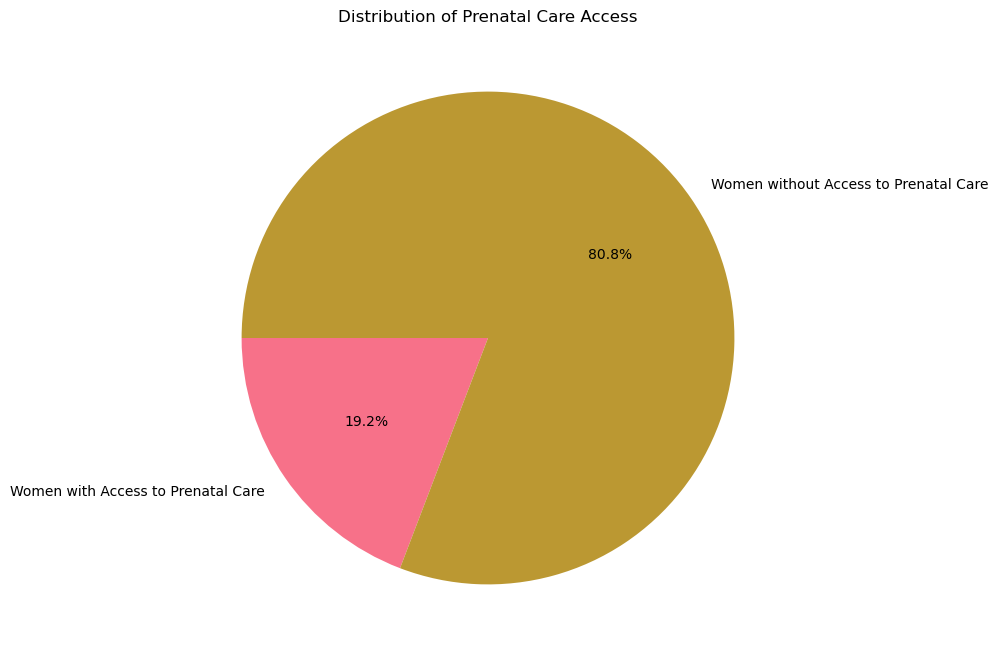

In [74]:
# Find the number of 'Yes' responses (Access)
# Including .get() as a recommendation
Access = fertility_df["prenatany"].value_counts().get("Yes", 0)
# Get the number of null values to show women with no prenatal care (No Access)
No_Access = fertility_df["prenatany"].isnull().sum()
# Use a list to put the Access and No Access together
Prenatal_Care = [Access, No_Access]
# Create labels
labels = ["Women with Access to Prenatal Care", "Women without Access to Prenatal Care"]
# Create a pie chart
# Including startangle to set the rotation of the pie chart
plt.figure(figsize=(8, 8)) # Optional: set figure size for better readability
plt.pie(Prenatal_Care, labels=labels, autopct="%1.1f%%", startangle=180) 
# Set title
plt.title("Distribution of Prenatal Care Access")

# Display the pie chart
plt.show()